# Project: No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### **Dataset Description: Analysis of No-show Medical Appointments in Brazil**

>This project utilizes a dataset containing information on **100,000 medical appointments** in Brazil and focuses on patient adherence to scheduled appointments. The dataset, sourced from **Kaggle**, provides insights into various factors that might influence whether patients show up for their appointments or not. 

#### **Dataset Features**

- **_ScheduledDay_**: This column specifies the day the patient set up their medical appointment.
- **_Neighborhood_**: Indicates the location of the hospital where the appointment takes place.
- **_Scholarship_**: Denotes whether the patient is enrolled in the Brazilian welfare program **Bolsa Família**.
  
#### **Important Note**
Please note the encoding of the last column in the dataset. It says **'No'** if the patient **attended** their appointment, and **'Yes'** if they did **not show up**. This is crucial for accurate analysis and interpretations of the dataset.

#### **Objective**

The objective of this project is to explore how different factors such as scheduling time, location of the hospital, and enrollment in social welfare might affect patient no-show rates. Through this analysis, we aim to identify patterns and provide recommendations to improve appointment compliance.



### Question(s) for Analysis
In this analysis, we will explore the factors affecting no-show rates for medical appointments in Brazil using a dataset of 100,000 records. Our primary focus will be to determine the overall no-show rate as a baseline for further comparison. Additionally, we will analyze the correlation between the time span from scheduling to the appointment day and no-show likelihood, and investigate demographic variables such as age and gender to identify trends in appointment compliance. This comprehensive analysis aims to uncover patterns that could inform more effective scheduling strategies and targeted interventions to improve patient attendance rates. 

In [2]:
#Python library installation 
# Set up import statements for all of the packages that I used
import pandas as pd
import numpy as np
import seaborn as sns
import collections
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

## Loading Data from CSV

The following Python code is used to load a dataset from a CSV file named `noshowappointments-kagglev2-may-2016.csv` into a pandas DataFrame. This dataset is typically used to analyze medical appointment no-shows.


In [4]:
df_nsa=pd.read_csv('noshowappointments-kagglev2-may-2016.csv', sep=',')
df_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Firstly we check the general structure of the dataset and analyse how to move forward with the further analysis.
df_nsa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df_nsa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#This shows the number of unique values in each column

df_nsa.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# This helps us view the index number and label for each column and understand the values i each column

for i, v in enumerate(df_nsa.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [9]:
# We will now like to inspect the data set for nulls and duplicates

df_nsa.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
df_nsa.duplicated().sum()

0

In [12]:
# function to get unique values
def unique(data):
    unique_values = pd.unique(data)

unique

<function __main__.unique(data)>

In [13]:
unique(df_nsa['Handcap'])

In [14]:
collections.Counter(df_nsa['Age']<0)

Counter({False: 110526, True: 1})


# Data Cleaning

## Correcting Age Data in the DataFrame

This section of the code cleans up the `Age` data in the `df_nsa` DataFrame by addressing invalid age entries. Invalid values like `-1`, likely due to data entry errors, are replaced with `0` to maintain data integrity and ensure statistical accuracy. We replace these values because `0` can signify an unspecified age without affecting analyses. After correction, we use `collections.Counter()` to verify no negative ages remain, confirming the dataset's reliability for further analysis. This step is crucial for accurate, compliant demographic analysis in health-related studies.

In [15]:
df_nsa.Age.replace(to_replace=-1, value=0, inplace=True, limit=None, regex=False, method='pad')
collections.Counter(df_nsa['Age']<0)

Counter({False: 110527})

In [16]:
# Assuming df is your DataFrame
df_nsa['ScheduledDay'] = pd.to_datetime(df_nsa['ScheduledDay'])
df_nsa['AppointmentDay'] = pd.to_datetime(df_nsa['AppointmentDay'])

# If the year is obviously incorrect and should be uniform across the dataset:
df_nsa['AppointmentDay'] = df_nsa['AppointmentDay'].apply(lambda x: x.replace(year=2016))

In [17]:
print('ScheduledDay range:', df_nsa['ScheduledDay'].min(), 'to', df_nsa['ScheduledDay'].max())
print('AppointmentDay range:', df_nsa['AppointmentDay'].min(), 'to', df_nsa['AppointmentDay'].max())

ScheduledDay range: 2015-11-10 07:13:56+00:00 to 2016-06-08 20:07:23+00:00
AppointmentDay range: 2016-04-29 00:00:00+00:00 to 2016-06-08 00:00:00+00:00


In [18]:
df_nsa['AppointmentDay'] = df_nsa['AppointmentDay'].dt.date

In [19]:
df_nsa['ScheduledDay'] = df_nsa['ScheduledDay'].dt.tz_localize(None)

In [20]:
# Convert columns to datetime if not already
df_nsa['ScheduledDay'] = pd.to_datetime(df_nsa['ScheduledDay'])
df_nsa['AppointmentDay'] = pd.to_datetime(df_nsa['AppointmentDay'])

In [21]:
# Creating new columns for Scheduled Day
df_nsa['Scheduled Date'] = df_nsa['ScheduledDay'].dt.date
df_nsa['Scheduled Time'] = df_nsa['ScheduledDay'].dt.time

In [22]:
# Creating new columns for Appointment Day
df_nsa['Appointment Date'] = df_nsa['AppointmentDay'].dt.date
df_nsa['Appointment Time'] = df_nsa['AppointmentDay'].dt.time

In [23]:
# Drop the 'ScheduledDay' and 'AppointmentDay' columns from the DataFrame
df_nsa = df_nsa.drop(columns=['ScheduledDay', 'AppointmentDay'])

In [24]:
df_nsa.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Scheduled Date', 'Scheduled Time',
       'Appointment Date', 'Appointment Time'],
      dtype='object')

In [25]:
# Define the new column order
new_order = ['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scheduled Date', 'Scheduled Time',
       'Appointment Date', 'Appointment Time',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show']

In [26]:
# Reorder the columns
df_nsa = df_nsa[new_order]

In [27]:
df_nsa.rename(columns={'no-show':'noshow'}, inplace=True)

In [28]:
df_nsa

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scheduled Date,Scheduled Time,Appointment Date,Appointment Time,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,2016-04-29,18:38:08,2016-04-29,00:00:00,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,2016-04-29,16:08:27,2016-04-29,00:00:00,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,2016-04-29,16:19:04,2016-04-29,00:00:00,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,2016-04-29,17:29:31,2016-04-29,00:00:00,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,2016-04-29,16:07:23,2016-04-29,00:00:00,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,MARIA ORTIZ,2016-05-03,09:15:35,2016-06-07,00:00:00,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,51,MARIA ORTIZ,2016-05-03,07:27:33,2016-06-07,00:00:00,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,21,MARIA ORTIZ,2016-04-27,16:03:52,2016-06-07,00:00:00,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,38,MARIA ORTIZ,2016-04-27,15:09:23,2016-06-07,00:00:00,0,0,0,0,0,1,No


In [29]:
df_nsa.rename(columns={'sms_received':'SmsReceived'}, inplace=True)

In [30]:
df_nsa= df_nsa.rename(columns=str.lower)

In [31]:
df_nsa['no-show'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_nsa['gender'].replace({'F': 0, 'M':1}, inplace=True)

In [32]:
df_nsa

,patientid,appointmentid,gender,age,neighbourhood,scheduled date,scheduled time,appointment date,appointment time,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,2016-04-29,18:38:08,2016-04-29,00:00:00,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,2016-04-29,16:08:27,2016-04-29,00:00:00,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,2016-04-29,16:19:04,2016-04-29,00:00:00,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,2016-04-29,17:29:31,2016-04-29,00:00:00,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,2016-04-29,16:07:23,2016-04-29,00:00:00,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,2016-05-03,09:15:35,2016-06-07,00:00:00,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,2016-05-03,07:27:33,2016-06-07,00:00:00,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,2016-04-27,16:03:52,2016-06-07,00:00:00,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,2016-04-27,15:09:23,2016-06-07,00:00:00,0,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How does different dependent factors affect noshow?)

In [33]:
#Dependent factors are for the Noshow factors are given by: 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'
#Hence we try to analyse the correlation between these parameters and how to reduce the no show value for this
df_nsa

,patientid,appointmentid,gender,age,neighbourhood,scheduled date,scheduled time,appointment date,appointment time,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,2016-04-29,18:38:08,2016-04-29,00:00:00,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,2016-04-29,16:08:27,2016-04-29,00:00:00,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,2016-04-29,16:19:04,2016-04-29,00:00:00,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,2016-04-29,17:29:31,2016-04-29,00:00:00,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,2016-04-29,16:07:23,2016-04-29,00:00:00,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,2016-05-03,09:15:35,2016-06-07,00:00:00,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,2016-05-03,07:27:33,2016-06-07,00:00:00,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,2016-04-27,16:03:52,2016-06-07,00:00:00,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,2016-04-27,15:09:23,2016-06-07,00:00:00,0,0,0,0,0,1,0


## Relationship between the dependent variable no-show to the independent variable age

Now, we try to check the relationship between the age group of different people with their attittude of not turning up for the appointment. And we see that the larger distribution of the people are from the lower age group that is below 40. But it has unfortunately no great relationship between all of them.

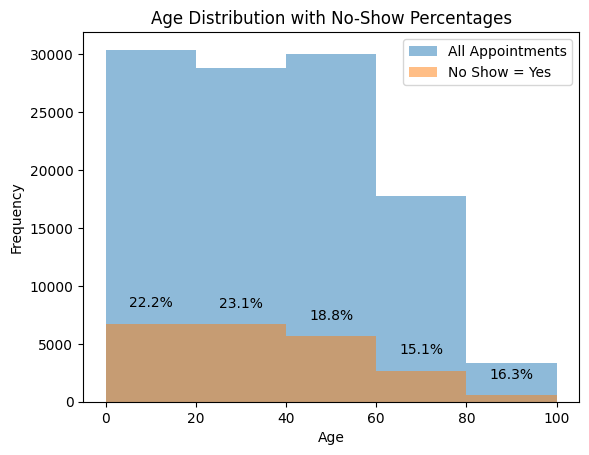

In [34]:
# Assuming df is your DataFrame
# Calculate the histogram data for all appointments and no-show appointments
bin_edges = np.arange(start=df_nsa['age'].min(), stop=df_nsa['age'].max(), step=20)  # adjust bin size as needed
all_counts, _ = np.histogram(df_nsa['age'], bins=bin_edges)
no_show_counts, _ = np.histogram(df_nsa[df_nsa['no-show'] == 1]['age'], bins=bin_edges)

# Calculate percentages of no-shows
no_show_percentage = (no_show_counts / all_counts) * 100

# Plot histograms
fig, ax = plt.subplots()
ax.hist(df_nsa['age'], bins=bin_edges, alpha=0.5, label='All Appointments')
ax.hist(df_nsa[df_nsa['no-show'] == 1]['age'], bins=bin_edges, alpha=0.5, label='No Show = Yes')

# Annotate percentages on the bars
for i in range(len(bin_edges)-1):
    if all_counts[i] > 0:  # avoid division by zero and empty bins
        ax.annotate(f'{no_show_percentage[i]:.1f}%', xy=((bin_edges[i] + bin_edges[i+1])/2, no_show_counts[i]),
                    xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')

# Set titles and labels
ax.set_title('Age Distribution with No-Show Percentages')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot
plt.show()


In [35]:
df_nsa['no-show'].corr(df_nsa['age'])

-0.06032036552755504

## Correlation with the hypertension and no show

Here we try to correlate the relationship between the patients having hypertension and them not showing up for the appointment. We see that only 19.7% of the patients have hypertension which also doesn't directly depend on the patients not showing up for the appointment.

In [ ]:
plt.pie(df_nsa['hipertension'].value_counts(), labels = ['No', 'Yes'], colors=['green', 'red'], 
        startangle=90, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Has Hypertension?', fontweight="bold")
     
plt.show()

In [36]:
df_nsa['no-show'].corr(df_nsa['hipertension'])

-0.03570117734501502

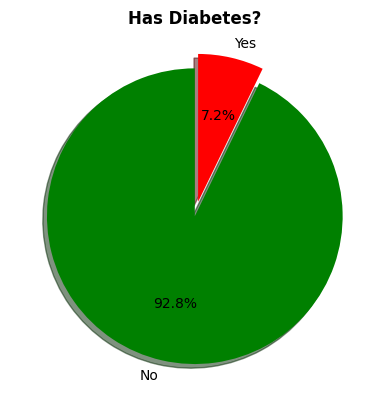

In [37]:
plt.pie(df_nsa['diabetes'].value_counts(), labels = ['No', 'Yes'], colors=['green', 'red'], 
        startangle=90, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Has Diabetes?', fontweight="bold")
     
plt.show()

In [38]:
df_nsa['no-show'].corr(df_nsa['diabetes'])

-0.015179943820773714

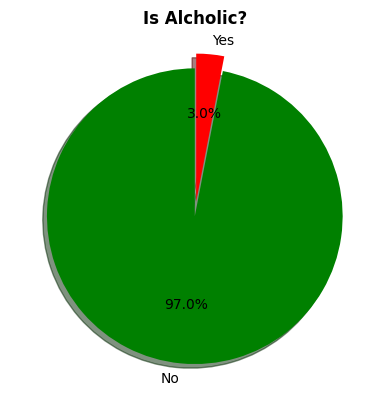

In [39]:
plt.pie(df_nsa['alcoholism'].value_counts(), labels = ['No', 'Yes'], colors=['green', 'red'], 
        startangle=90, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Is Alcholic?', fontweight="bold")
     
plt.show()

In [40]:
df_nsa['no-show'].corr(df_nsa['alcoholism'])

-0.00019604372362816105

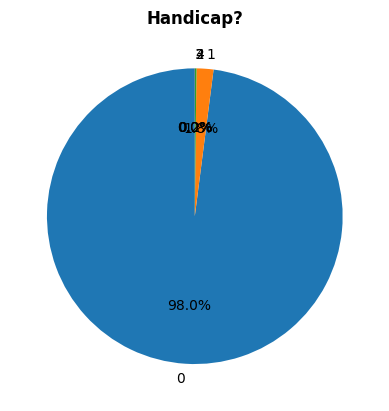

In [41]:
plt.pie(df_nsa['handcap'].value_counts(), labels = ['0', '1', '2', '3', '4'], 
        startangle=90, 
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Handicap?', fontweight="bold")
     
plt.show()

Up to this point, our analysis has focused on potential patient-related factors that might contribute to appointment no-shows. However, we have found that there are no significant patient-related reasons that consistently lead to these no-shows.

We are now shifting our analysis to explore potential flaws or limitations within the system that might influence patients' failure to attend appointments. We will also investigate if there is a correlation between these system-related factors and patient no-shows

First, we will examine whether there is a relationship between patients receiving SMS reminders and their attendance at appointments. Preliminary findings suggest a positive correlation exists: patients are more likely to miss their appointments when they do not receive a message.

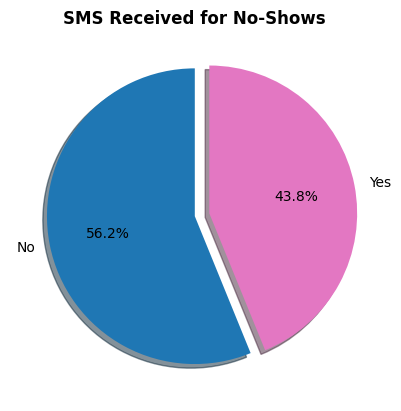

In [42]:
# Filter the DataFrame to only include cases where no_show is 1
df_noshow_sms = df_nsa[df_nsa['no-show'] == 1]

# Plotting the pie chart for SMS received in no-show cases
plt.pie(df_noshow_sms['sms_received'].value_counts(), labels=['No', 'Yes'], colors=['tab:blue', 'tab:pink'],
        startangle=90, shadow=True, explode=(0, 0.1),
        radius=1.0, autopct='%1.1f%%')

plt.title('SMS Received for No-Shows', fontweight="bold")

plt.show()


### Impact of Scheduling Lead Time on Appointment Attendance

We will now investigate whether there is a relationship between the duration between the scheduled date and the appointment date, and no-shows. Specifically, we aim to determine if a longer interval between scheduling and the actual appointment date increases the likelihood of no-shows over time.

In [43]:
# Assuming the DataFrame is already loaded and named 'df_nsa'
# Convert 'scheduled_date' and 'appointment_date' columns to datetime
df_nsa['scheduled date'] = pd.to_datetime(df_nsa['scheduled date'])
df_nsa['appointment date'] = pd.to_datetime(df_nsa['appointment date'])

# Calculate the difference in days between appointment date and scheduled date
df_nsa['days_diff'] = (df_nsa['appointment date'] - df_nsa['scheduled date']).dt.days

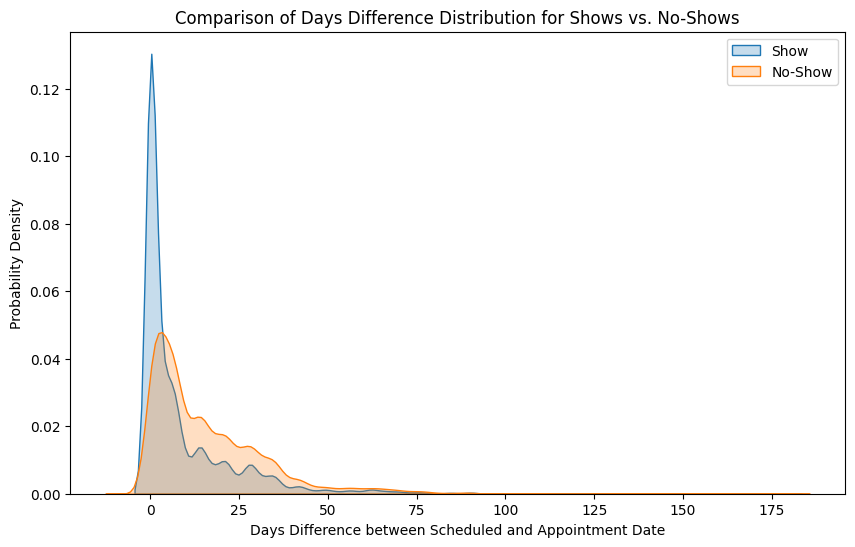

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Update the parameter from 'shade' to 'fill'
sns.kdeplot(data=df_nsa[df_nsa['no-show'] == 0]['days_diff'], label='Show', fill=True)
sns.kdeplot(data=df_nsa[df_nsa['no-show'] == 1]['days_diff'], label='No-Show', fill=True)

plt.title('Comparison of Days Difference Distribution for Shows vs. No-Shows')
plt.xlabel('Days Difference between Scheduled and Appointment Date')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

We have observed that there is indeed a trend: if there is a longer delay between scheduling an appointment and the appointment date itself, it is more likely that the patient will not show up

<a id='conclusions'></a>
## Conclusions

Our analysis initially focused on potential patient-related factors contributing to appointment no-shows, but found no significant causes. We are now exploring system-related flaws that might influence no-shows and assessing correlations between these factors and patient attendance.

We first examined the relationship between SMS reminders and attendance. Preliminary results indicate a positive correlation: patients are more likely to miss appointments if they do not receive a message. Additionally, we are investigating the impact of the time interval between scheduling and the appointment date. Our findings suggest that a longer interval is associated with a higher likelihood of no-shows.
It's important to note that there may be other influential factors not captured by our data additionallly we coundn't address about the neighbourhood parameter which could also impact the effectively study about the neigbh, highlighting the limitations of our dataset and underscoring the need for broader data collection to fully analyze all potential influences on no-show rates."

This revised summary succinctly captures the shift from analyzing patient behaviors to examining system limitations, presents key findings, and acknowledges the data limitations, all within the word count constraint

In [58]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e